<h1><center>Water Quality</center></h1>
<p><center>A Data Science project by <b>Aditya Kumar, Aditya Nayak &amp; Kunal Inglunkar</b></center></p>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt # Interactive data viz package cmd: pip install altair
import pygwalker as pyg #Access tableau feature in python cmd: pip install pygwalker
from skimpy import skim, generate_test_data #Gives overall stats cmd: pip install skimpy
# from summarytools import dfSummary
import sidetable # Better value_counts function cmd: pip install sidetable
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("Cleaned_data.csv")
df = df.drop("Unnamed: 0",axis = 1)
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<h2>About Dataset</h2>
<h3>Context:</h3>
<p>Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.</p>

<h3>Content</h3>
<p>The water_potability.csv file contains water quality metrics for 3276 different water bodies.</p>

<ol>
<b><li>pH value:</li></b>
<p>PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.</p>
<br>
<b><li>Hardness:</li></b>
<p>Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.</p>
<br>
<b><li>Solids (Total dissolved solids - TDS):</li></b>
<p>Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.</p>
<br>
<b><li>Chloramines:</li></b>
<p>Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.</p>
<br>
<b><li>Sulfate:</li></b>
<p>Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.</p>
<br>
<b><li>Conductivity:</li></b>
<p>Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.</p>
<br>
<b><li>Organic_carbon:</li></b>
<p>Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.</p>
<br>
<b><li>Trihalomethanes:</li></b>
<p>THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.</p>
<br>
<b><li>Turbidity:</li></b>
<p>The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.</p>
<br>
<b><li>Potability:</li></b>
<p>Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.</p>
</ol>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [21]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.608364   
std       1.469956    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [22]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3276   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0     ┃ p25     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ ph                    │    0 │      0 │      7.1 │    1.5 │      0 │     6.3 │     7.9 │      14 │   ▁▆█▁  │  │
│ │ Hardness              │    0 │      0 │      200 │     33 │     47 │     180 │     220 │     320 │   ▁▅█▂  │  │
│ │ Solids                │    0 │      0 │    22000 │   8800 │    320 │   16000 │   27000 │   61000 │  ▁█▇▂   │  │
│ │ Chloramines           │    0 │      0 │      7.1 │    1.6 │   0.35 │     6.1 │     8.1 │      13 │   ▁▆█▂  │  │
│ │ Sulfate               │    0 │      0 │      330 │     36 │    130 │     320 │     350 │     480 │    ▂█▂  │  │
│ │ Conductivity          │    0 │      0 │      430 │     81 │    180 │     370 │     480 │     750 │   ▅█▅▁  │  │
│ │ Organic_carbon        │    0 │      0 │       14 │    3.3 │    2.2 │      12 │      17 │      28 │   ▂█▆▁  │  │
│ │ Trihalomethanes       │    0 │      0 │       66 │     16 │   0.74 │      57 │      77 │     120 │   ▁▅█▂  │  │
│ │ Turbidity             │    0 │      0 │        4 │   0.78 │    1.4 │     3.4 │     4.5 │     6.7 │   ▃█▇▂  │  │
│ │ Potability            │    0 │      0 │     0.39 │   0.49 │      0 │       0 │       1 │       1 │ █    ▅  │  │
│ └───────────────────────┴──────┴────────┴──────────┴────────┴────────┴─────────┴─────────┴─────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [23]:
# dfSummary(df)

<p>From the following description of the dataset we observe:</p>
* That there are <b>missing values in ph, Sulfate &amp; Trihalomethanes.</b><br>
* Potability is a categorical variable which tells if the water is potable(1) or not potable(0).<br>
* Thus, converting the potability column from int to charecter.<br>

In [24]:
def pot_label(p):
    if(p == 0):
        return 'No'
    else:
        return 'Yes'
    
df.Potability = df.Potability.apply(pot_label)
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity Potability  
0       10.379783        86.990970   2.963135         No  
1       15.180013        56.329076   4.500656         No  
2       16.868637        66.420093   3.055934         No  
3       18.436524       100.341674   4.628771         No  
4       11.558279        31.997993   4.075075         No

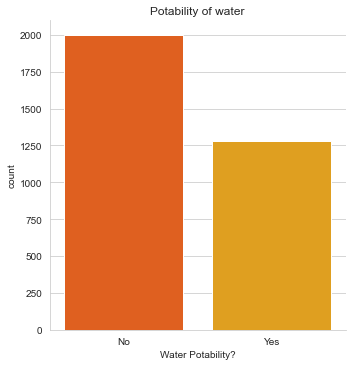

In [25]:
sns.set_style("whitegrid")
a = sns.catplot('Potability',kind = 'count',data = df ,palette='autumn')
a.set(xlabel ="Water Potability?", ylabel = "count", title ='Potability of water')

<p>In order to fill the missing values of pH, Sulfate &amp; Trihalomethane columns, we will have to have a look at the distribution &amp; based on that the appropiate approximation can be made.</p>

In [26]:
chart = alt.Chart(df).mark_bar().encode(
    alt.X('ph:Q',bin = True,axis = alt.Axis(title="pH value")),
    alt.Y('count()', axis = alt.Axis(title="count"))).properties(title="Distribution of pH values")
chart

alt.Chart(...)

In [27]:
chart1 = alt.Chart(df).mark_bar().encode(
    alt.X('Sulfate:Q',bin = True,axis = alt.Axis(title="Sulfate content (mg\L)")),
    alt.Y('count()', axis = alt.Axis(title="count"))).properties(title="Distribution of Sulfate values")
chart1

alt.Chart(...)

In [28]:
chart2 = alt.Chart(df).mark_bar().encode(
    alt.X('Trihalomethanes:Q',bin = True,axis = alt.Axis(title="Trihalomethanes content (μg/L)")),
    alt.Y('count()', axis = alt.Axis(title="count"))).properties(title="Distribution of Trihalomethane values")
chart2

alt.Chart(...)

<p>From the histograms, we can infer that the variables are normally distributed and hence can take the mean values of the three variables.</p>

In [29]:
df.ph.fillna(df.ph.mean(),inplace=True)
df.Sulfate.fillna(df.Sulfate.mean(),inplace=True)
df.Trihalomethanes.fillna(df.Trihalomethanes.mean(),inplace=True)
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity Potability  
0       10.379783        86.990970   2.963135         No  
1       15.180013        56.329076   4.500656         No  
2       16.868637        66.420093   3.055934         No  
3       18.436524       100.341674   4.628771         No  
4       11.558279        31.997993   4.075075         No

In [30]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3276   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0     ┃ p25     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ ph                    │    0 │      0 │      7.1 │    1.5 │      0 │     6.3 │     7.9 │      14 │   ▁▆█▁  │  │
│ │ Hardness              │    0 │      0 │      200 │     33 │     47 │     180 │     220 │     320 │   ▁▅█▂  │  │
│ │ Solids                │    0 │      0 │    22000 │   8800 │    320 │   16000 │   27000 │   61000 │  ▁█▇▂   │  │
│ │ Chloramines           │    0 │      0 │      7.1 │    1.6 │   0.35 │     6.1 │     8.1 │      13 │   ▁▆█▂  │  │
│ │ Sulfate               │    0 │      0 │      330 │     36 │    130 │     320 │     350 │     480 │    ▂█▂  │  │
│ │ Conductivity          │    0 │      0 │      430 │     81 │    180 │     370 │     480 │     750 │   ▅█▅▁  │  │
│ │ Organic_carbon        │    0 │      0 │       14 │    3.3 │    2.2 │      12 │      17 │      28 │   ▂█▆▁  │  │
│ │ Trihalomethanes       │    0 │      0 │       66 │     16 │   0.74 │      57 │      77 │     120 │   ▁▅█▂  │  │
│ │ Turbidity             │    0 │      0 │        4 │   0.78 │    1.4 │     3.4 │     4.5 │     6.7 │   ▃█▇▂  │  │
│ └───────────────────────┴──────┴────────┴──────────┴────────┴────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Potability                │       0 │          0 │                            1 │                     3300 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<p>We now have a complete dataset &amp; can begin our analysis.<\p>

Text(0.5, 0, 'pH')

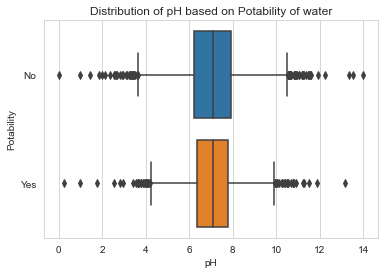

In [31]:
sns.boxplot(data=df, x="ph",y = 'Potability')
plt.title("Distribution of pH based on Potability of water")
plt.xlabel("pH")

Text(0.5, 1.0, 'Violinplot of pH distribution')

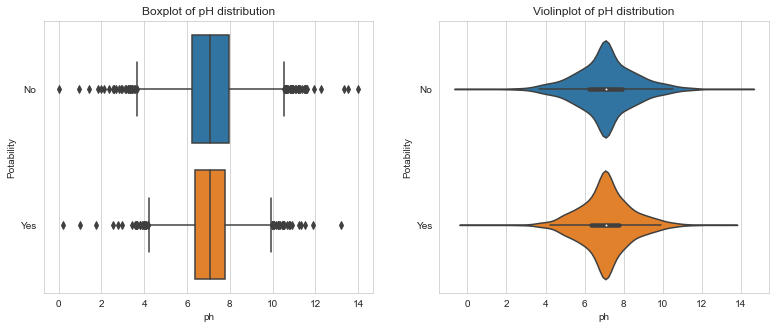

In [32]:
fig, (ax_box, ax_violin) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.boxplot(x="ph", y="Potability", data=df, ax=ax_box)
sns.violinplot(x="ph", y="Potability", data=df, ax=ax_violin)
ax_box.set_title("Boxplot of pH distribution")
ax_violin.set_title("Violinplot of pH distribution")

<AxesSubplot:>

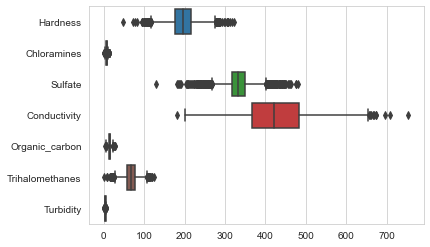

In [33]:
sns.boxplot(data=df[['Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']], orient="h")

Text(0.5, 1.0, 'Violinplot of Chloramines(ppm), Organic Carbon(ppm) & Turbidity(NTU)')

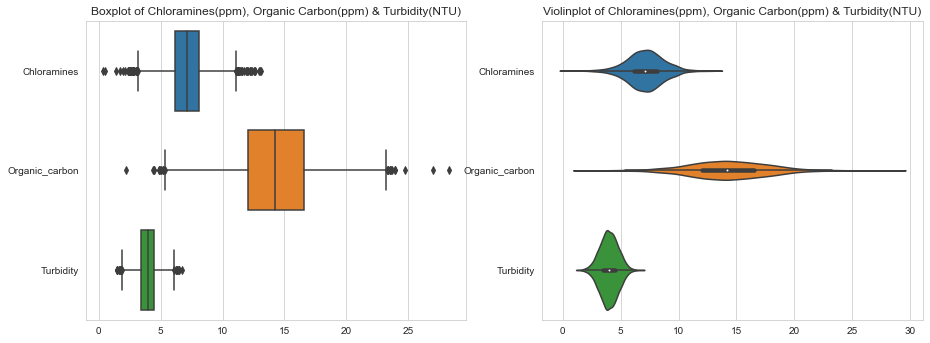

In [34]:
fig, (ax_box1, ax_violin1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5.5))
sns.boxplot(data=df[['Chloramines','Organic_carbon','Turbidity']],ax=ax_box1,orient='h')
sns.violinplot(data=df[['Chloramines','Organic_carbon','Turbidity']],ax=ax_violin1,orient='h')
ax_box1.set_title("Boxplot of Chloramines(ppm), Organic Carbon(ppm) & Turbidity(NTU)")
ax_violin1.set_title("Violinplot of Chloramines(ppm), Organic Carbon(ppm) & Turbidity(NTU)")

Text(0.5, 1.0, 'Violinplot of Sulfates(mg/L) & Conductivity(μS/cm)')

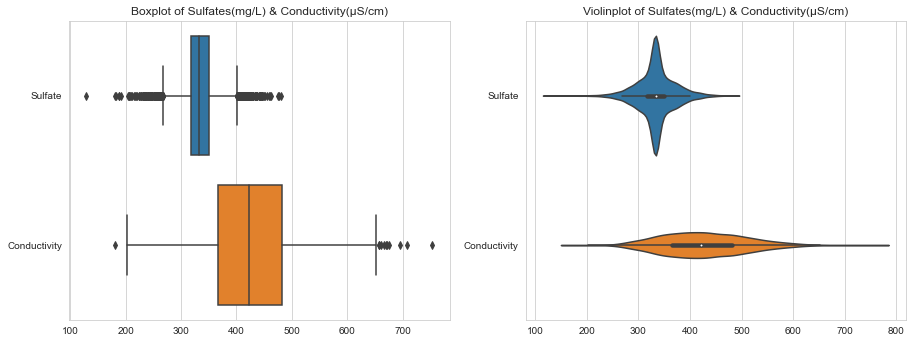

In [35]:
fig, (ax_box2, ax_violin2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5.5))
sns.boxplot(data=df[['Sulfate','Conductivity']],orient="h",ax=ax_box2)
sns.violinplot(data=df[['Sulfate','Conductivity']],ax=ax_violin2,orient='h')
ax_box2.set_title("Boxplot of Sulfates(mg/L) & Conductivity(μS/cm)")
ax_violin2.set_title("Violinplot of Sulfates(mg/L) & Conductivity(μS/cm)")

Text(0.5, 0, 'Sulfate Amount(ppm)')

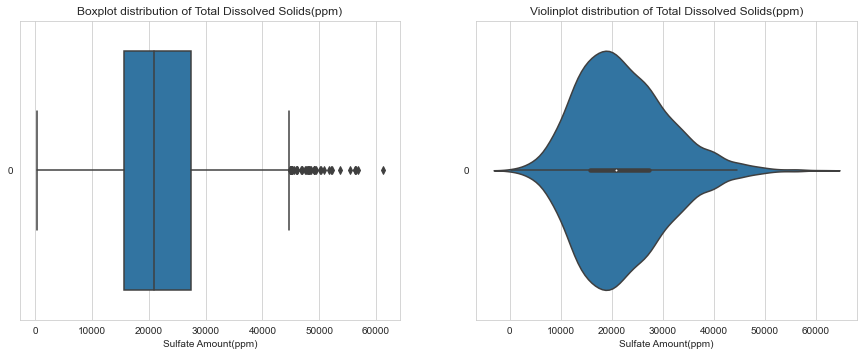

In [36]:
fig, (ax_box3, ax_violin3) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5.5))
sns.boxplot(data=df.Solids,orient="h",ax=ax_box3)
sns.violinplot(data = df.Solids,orient="h",ax=ax_violin3)
ax_box3.set_title("Boxplot distribution of Total Dissolved Solids(ppm)")
ax_violin3.set_title("Violinplot distribution of Total Dissolved Solids(ppm)")
ax_box3.set_xlabel("Sulfate Amount(ppm)")
ax_violin3.set_xlabel("Sulfate Amount(ppm)")

<p> From the following box and violin plots, we can notice there are many outliers present in our dataset.</p>

<AxesSubplot:>

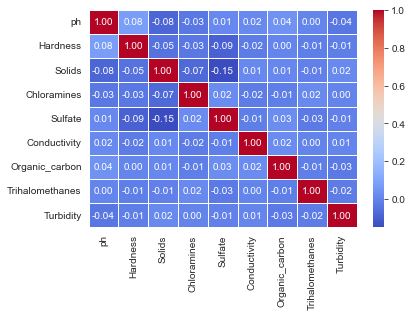

In [37]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

In [38]:
from sklearn.preprocessing import StandardScaler

X1 = df.copy()
X1 = X1.drop('Potability',axis=1)

scaler = StandardScaler()
scaler.fit(X1)
Xa = scaler.transform(X1)
Xa[0:5]

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01,
         1.12414846e-01,  9.65956999e-01,  1.70895423e+00,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01,
        -3.07693708e-01, -1.47992068e-02,  2.06257500e+00,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01,
         1.36059386e+00, -1.47992068e-02, -9.40321148e-02,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       [ 8.40950402e-01,  5.47651374e-01,  4.93304442e-04,
         5.92007821e-01,  6.44129611e-01, -7.78829962e-01,
         1.25513443e+00,  2.15287376e+00,  8.48411520e-01],
       [ 1.36856889e+00, -4.64429087e-01, -4.60248570e-01,
        -3.63697933e-01, -6.49521550e-01, -3.43938909e-01,
        -8.24357169e-01, -2.18159864e+00,  1.38785531e-01]])

In [39]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity Potability  
0       10.379783        86.990970   2.963135         No  
1       15.180013        56.329076   4.500656         No  
2       16.868637        66.420093   3.055934         No  
3       18.436524       100.341674   4.628771         No  
4       11.558279        31.997993   4.075075         No

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#dfq = pd.DataFrame(Xa,columns=df.columns)
dfq = pd.DataFrame(Xa,columns=X1.columns)
dfq= dfq.dropna()

# Select only the predictor variables you want to check for multicollinearity
predictors = dfq[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

# Create a numpy array from the predictor variables
X = np.array(predictors)

# Calculate the VIF values for each predictor variable
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

[1.0165177423953775, 1.0199953208201122, 1.0390041052617076, 1.0082018676546818, 1.0357520183373805, 1.0022011013857313, 1.0040145412909174, 1.00198307734901, 1.0029811783690175]


<p>From this part we understand that  there is high multicolinearity within the features. Especially for missing values like
 pH, Sulfates &amp; trihalomethanes. where VIF > 10 indicating that other features can be made use of to predict these features.</p>

In [41]:
dfq.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -1.027333e-14  0.259195 -0.139471     0.112415  0.965957      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694 -0.014799      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594 -0.014799     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  0.644130     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -0.649522     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.180651         1.306149  -1.286298  
1        0.270597        -0.638480   0.684218  
2        0.781117         0.001509  -1.167365  
3        1.255134         2.152874   0.848412  
4       -0.824357        -2.181599   0.138786

In [42]:
X1 = X1.dropna()
X1

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.396293   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [43]:
alt.Chart(df).mark_circle(size=60).encode(
    x = alt.X('ph',axis=alt.Axis(title="pH")),
    y = alt.Y('Hardness',axis=alt.Axis(title="Hardness(mg/L)")),
    color=alt.Color('Potability:O',scale = alt.Scale(scheme='magma')),
    tooltip=['Solids:Q','Chloramines:Q','Sulfate:Q','Conductivity:Q','Organic_carbon:Q','Trihalomethanes:Q','Turbidity:Q']
).properties(title="pH vs. Hardness").interactive()
#Double tap graph to re-center

alt.Chart(...)

<p>On observing the plots of our dataset, we notice that there are pH values that do not make sense. From our research we know that the ideal pH range of water that is drinkable is between <b>6.5 - 8.5</b>. However, this is not seen from the given dataset. For instance, the data states that a pH value of 4 is drinkable.There are also instances where the pH value is greater than 10 and is marked as drinkable.</p>

In [44]:
alt.Chart(df).mark_circle(size=60).encode(
    x = alt.X('ph',axis=alt.Axis(title = "pH")),
    y = alt.Y('Sulfate',axis = alt.Axis(title = 'Sulfate amount(mg/L)')),
    color = alt.Color('Potability:O',scale = alt.Scale(scheme='dark2')),
    tooltip = ['Solids:Q', 'Chloramines:Q', 'Conductivity:Q', 'Organic_carbon:Q']
).properties(title="pH vs. Sulfates").interactive()

alt.Chart(...)

In [45]:
alt.Chart(df).mark_circle(size=60).encode(
    x = alt.X('ph',axis=alt.Axis(title = "pH")),
    y = alt.Y('Chloramines',axis = alt.Axis(title = 'Chloramine amount(ppm)')),
    color = alt.Color('Potability:O',scale = alt.Scale(scheme='category10')),
    tooltip = ['Solids:Q', 'Sulfate:Q', 'Conductivity:Q', 'Organic_carbon:Q']
).properties(title="pH vs. Chloramines").interactive()

alt.Chart(...)

In [46]:
alt.Chart(df).mark_circle(size=60).encode(
    x = alt.X('ph',axis=alt.Axis(title = "pH")),
    y = alt.Y('Solids',axis = alt.Axis(title = 'TDS amount(ppm)')),
    color = alt.Color('Potability:O',scale = alt.Scale(scheme='set1')),
    tooltip = ['Sulfate:Q', 'Chloramines:Q', 'Conductivity:Q', 'Organic_carbon:Q']
).properties(title="pH vs. Total Dissolved Solids").interactive()

alt.Chart(...)

In [76]:
import plotly.express as px
fig=px.histogram(df,x='Sulfate',color='Potability',marginal='box',title="Histogram of sulfate vs Potability")
fig.show()

In [77]:
fig2=px.histogram(df,x='Chloramines',color='Potability',marginal='box',title="Histogram of Chloramines vs Potability")
fig2.show()

In [78]:
fig3=px.histogram(df,x='Conductivity',color='Potability',marginal='box',title="Conductivity of sulfate vs Potability")
fig3.show()

<h2>Prediction Modeling</h2>
<h4>Using Logistic Regression:</h4>

In [47]:
#Blocks for data reduction in order to build models.
df1 = pd.read_csv("Outlier_treated_data.csv")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X = df1[["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
Y = df1.Potability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
log_reg = LogisticRegression()

In [48]:
log_reg.fit(X_train,Y_train)
y_pred = log_reg.predict(X_test)

print(y_pred[0:5],"\n")
print(Y_test.head())

[0 0 0 0 0] 

2017    1
2533    0
589     0
482     0
2620    0
Name: Potability, dtype: int64


In [49]:
conf_matrix = confusion_matrix(Y_test, y_pred)
  
print ("Confusion Matrix :\n", conf_matrix,"\n\n")
print (f"Model accuracy :{round(accuracy_score(Y_test, y_pred),3)*100}%")

Confusion Matrix :
 [[502   0]
 [317   0]] 


Model accuracy :61.3%


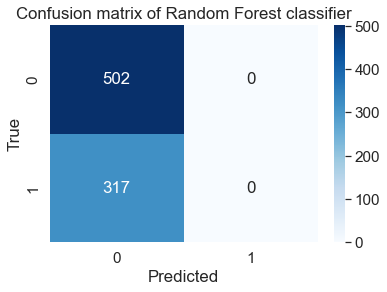

In [59]:
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion matrix of Random Forest classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[363 139]
 [230  87]]


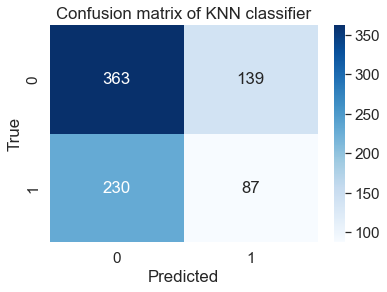

Model Accuracy of KNN :0.5494505494505495


In [64]:
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion matrix of KNN classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f"Model Accuracy of KNN :{knn_acc}")

In [51]:
knn_acc

0.5494505494505495

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the accuracy score
acc = accuracy_score(Y_test, y_pred)

In [53]:
acc

0.6568986568986569

In [55]:
rf_y_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(Y_test, rf_y_pred)
print(rf_cm)

[[442  60]
 [221  96]]


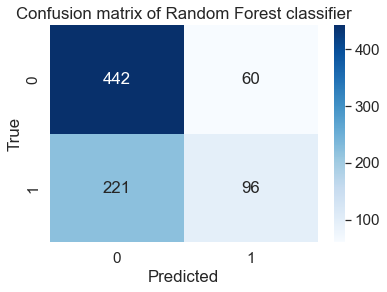

Model Accuracy of Random Forest is : 0.6410256410256411


In [65]:
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion matrix of Random Forest classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f"Model Accuracy of Random Forest is : {acc}")

In [68]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()


xgb_model.fit(X_train, Y_train)

y_pred = xgb_model.predict(X_test)

xg_acc = accuracy_score(Y_test, y_pred)

In [62]:
xg_y_pred = xgb_model.predict(X_test)
xg_cm = confusion_matrix(Y_test, y_pred)
print(xg_cm)

[[400 102]
 [192 125]]


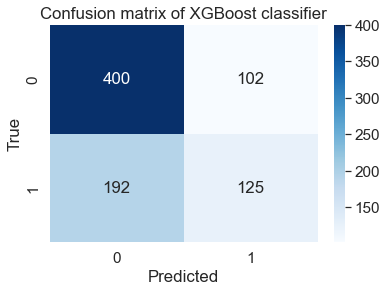

Model Accuracy of XGBoost : 0.6410256410256411


In [69]:
sns.set(font_scale=1.4)
sns.heatmap(xg_cm, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion matrix of XGBoost classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f"Model Accuracy of XGBoost : {xg_acc}")